In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data_banknote_authentication.txt', engine='c', header=None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


O arquivo 'data_banknote_authentication.txt' possui dados que foram extraídos de imagens de cédulas falsas e genuínas. O conjunto de dados possui 1372 entradas com 5 colunas. Os atributos dessas colunas são respectivamente:'Variance','Skewness', 'Curtosis', 'Entropy', 'Class'.

In [5]:
data.columns=['Variance','Skewness', 'Curtosis', 'Entropy', 'Class']

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [7]:
data[data['Class']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Variance,610.0,-1.868443,1.881183,-7.0421,-3.061450,-1.806100,-0.541770,2.3917
Skewness,610.0,-0.993576,5.404884,-13.7731,-5.810025,0.172775,3.189275,9.6014
Curtosis,610.0,2.148271,5.261811,-5.2861,-1.357500,0.373720,5.626350,17.9274
Entropy,610.0,-1.246641,2.070984,-7.5887,-2.458375,-0.661650,0.341790,2.1353
Class,610.0,1.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.0000


In [8]:
data[data['Class']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Variance,762.0,2.276686,2.019348,-4.2859,0.883345,2.553100,3.884450,6.8248
Skewness,762.0,4.256627,5.138792,-6.9321,0.450063,5.668800,8.691975,12.9516
Curtosis,762.0,0.796718,3.239894,-4.9417,-1.709700,0.700605,2.652925,8.8294
Entropy,762.0,-1.147640,2.125077,-8.5482,-2.228250,-0.552380,0.423258,2.4495
Class,762.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000


In [9]:
data.head(3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


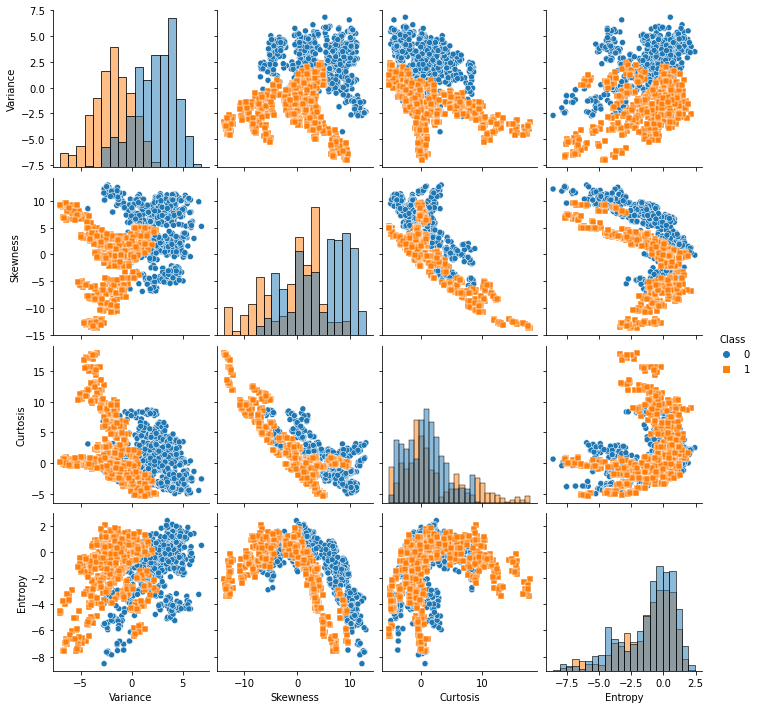

In [10]:
sns.pairplot(data,hue='Class', diag_kind="hist",  markers=["o", "s"])

<AxesSubplot:xlabel='Variance', ylabel='Count'>

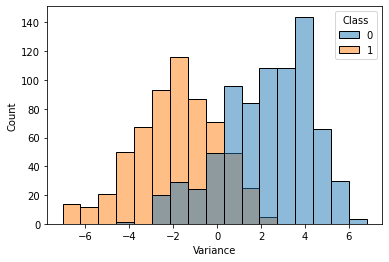

In [11]:
sns.histplot(x='Variance', hue='Class', data=data)

Podemos ver pelos gráficos acima que há uma boa relação entre a classe e a variância com o histograma mostrando que para valores negativos até -2 uma predominância quase total de cédulas verdadeiras e de +3 em diante de cédulas falsas.

<AxesSubplot:xlabel='Skewness', ylabel='Count'>

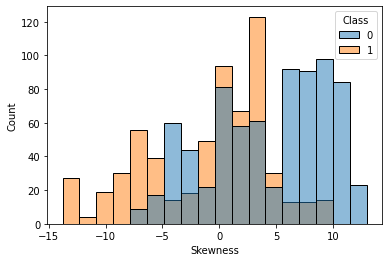

In [12]:
sns.histplot(x='Skewness', hue='Class', data=data)

Embora não possua uma relação tão forte quanto a variância, a assimetria possui uma relação significativa o bastante com a classificação da cédula.

<AxesSubplot:>

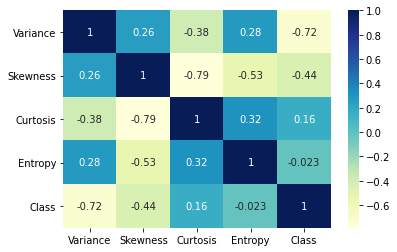

In [13]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

O mapa acima mostra forte correlação negativa entre (Classe,Variância) e (Classe, Assimetria), com valores de -0.72 e -0.44 respectivamente

<AxesSubplot:xlabel='Class', ylabel='Skewness'>

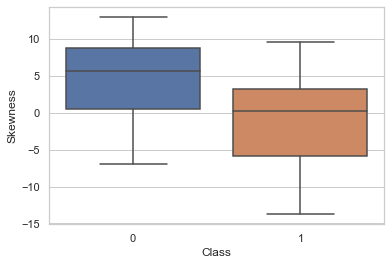

In [31]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=data, x='Class', y='Skewness')

Enquanto as células verdadeiras possuem maior variância (5.4 contra 5.1) Temos medianas bem definidas em um valor proximo de -1 para cédulas verdadeiras e 6 para cédulas falsas. Mais importante, vemos que 75% dos pontos estão aproximadamente entre 2.5 e -13 para cédulas verdadeiras e entre 1 e 13 para células falsas 

<AxesSubplot:xlabel='Class', ylabel='Variance'>

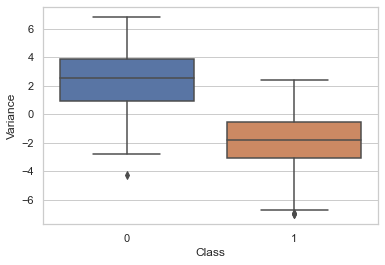

In [32]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=data, x='Class', y='Variance')

Para variância essa separação é ainda maior, com 75% dos pontos separados em -1 até -7 aproximadamente para células verdadeiras e 1 até 7 para células falsas